In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
plt.style.use('seaborn-white')

In [456]:
boston = pd.read_csv('../Labs 3.6.3/Data/Boston.csv', usecols=range(1,15))
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


We load the boston data set and try to predict the median household income (medv) from the best set of predictors, using backwards and forwards selection.

In [526]:
def calculateRSS(X, y, feature_set):
    # Calculate RSS from the least square fit of the set of features
    
    model = sm.OLS(y, X[feature_set])
    regr = model.fit()
    RSS = ((regr.predict(X[feature_set]) - y) ** 2).sum()
    return RSS, regr

In [527]:
def addBest(X,y,current_predictors, unused_predictors):
    # Find the best model that adds one predictor
    
    RSS = list()
    for i in unused_predictors:
        predictor_set = current_predictors[:] + list([i])
        current_RSS, current_regr = calculateRSS(X,y,predictor_set)
        RSS.append(current_RSS)
    min_RSS = min(RSS)
    idx = RSS.index(min_RSS)
    best_predictor = unused_predictors[idx]
    return best_predictor

In [528]:
def forwardStepwiseSelection(X,y,all_predictors):
    # The Forward Stepwise Selection algorithm
    p = len(all_predictors)

    current_predictors = list()
    unused_predictors = all_predictors[:]
    k_values = range(1,p+1)
    predictor_sets = list()

    for k in k_values:
        best_predictor = addBest(X,y,current_predictors,unused_predictors)
        current_predictors.append(best_predictor)
        unused_predictors.remove(best_predictor)
        predictor_sets.append(current_predictors[:])
    
    return k_values, predictor_sets

In [529]:
def removeWorst(X,y,current_predictors):
    # Find the best model that removes one predictor
    RSS = list()
    for i in current_predictors:
        predictor_set = current_predictors[:]
        predictor_set.remove(i)
        current_RSS, current_regr = calculateRSS(X,y,predictor_set)
        RSS.append(current_RSS)
    
    min_RSS = min(RSS)
    idx = RSS.index(min_RSS)
    worst_predictor = current_predictors[idx]
    return worst_predictor

In [530]:
def backwardStepwiseSelection(X,y,all_predictors):
    # The Backward Stepwise Selection algorithm

    p = len(all_predictors)

    current_predictors = all_predictors[:]
    k_values = list(range(1,p+1))
    k_values.reverse()
    first_RSS = calculateRSS(X, y, all_predictors)
    predictor_sets = [list(current_predictors[:])]

    for i in range(0,len(k_values)-1):
        worst_predictor = removeWorst(X,y,current_predictors)
        current_predictors.remove(worst_predictor)
        predictor_sets.append(current_predictors[:])

    return k_values, predictor_sets

In [531]:
def error_plots(k_values, predictor_sets, title):
    # Plot RSS, adjusted R-squared, AIC (Akaike information criterion) and BIC (Bayesian information criterion)

    RSS = list()
    adj_rsquared = list()
    aic = list()
    bic = list()

    for i in range(len(predictor_sets)):
        current_set = predictor_sets[i]
        rss, regr = calculateRSS(X, y, current_set)
        RSS.append(rss)
        adj_rsquared.append(regr.rsquared_adj)
        aic.append(regr.aic)
        bic.append(regr.bic)

    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    plt.subplot(2,2,1)
    plt.plot(k_values,RSS)
    min_RSS = min(RSS)
    idx = RSS.index(min_RSS)
    plt.plot(k_values[idx],RSS[idx],'ro')
    plt.xlabel('Number of predictors')
    plt.ylabel('Residual Sum of Squares')

    plt.subplot(2,2,2)
    plt.plot(k_values,adj_rsquared)
    max_rsquared = max(adj_rsquared)
    idx = adj_rsquared.index(max_rsquared)
    plt.plot(k_values[idx],adj_rsquared[idx],'ro')
    plt.xlabel('Number of predictors')
    plt.ylabel('Adjusted $R^2$')
    
    plt.subplot(2,2,3)
    plt.plot(k_values,aic)
    min_aic = min(aic)
    idx = aic.index(min_aic)
    plt.plot(k_values[idx],aic[idx],'ro')
    plt.xlabel('Number of predictors')
    plt.ylabel('AIC')
    
    plt.subplot(2,2,4)
    plt.plot(k_values,bic)
    min_bic = min(bic)
    idx = bic.index(min_bic)
    plt.plot(k_values[idx],bic[idx],'ro')
    plt.xlabel('Number of predictors')
    plt.ylabel('BIC')
    
    plt.suptitle(title)



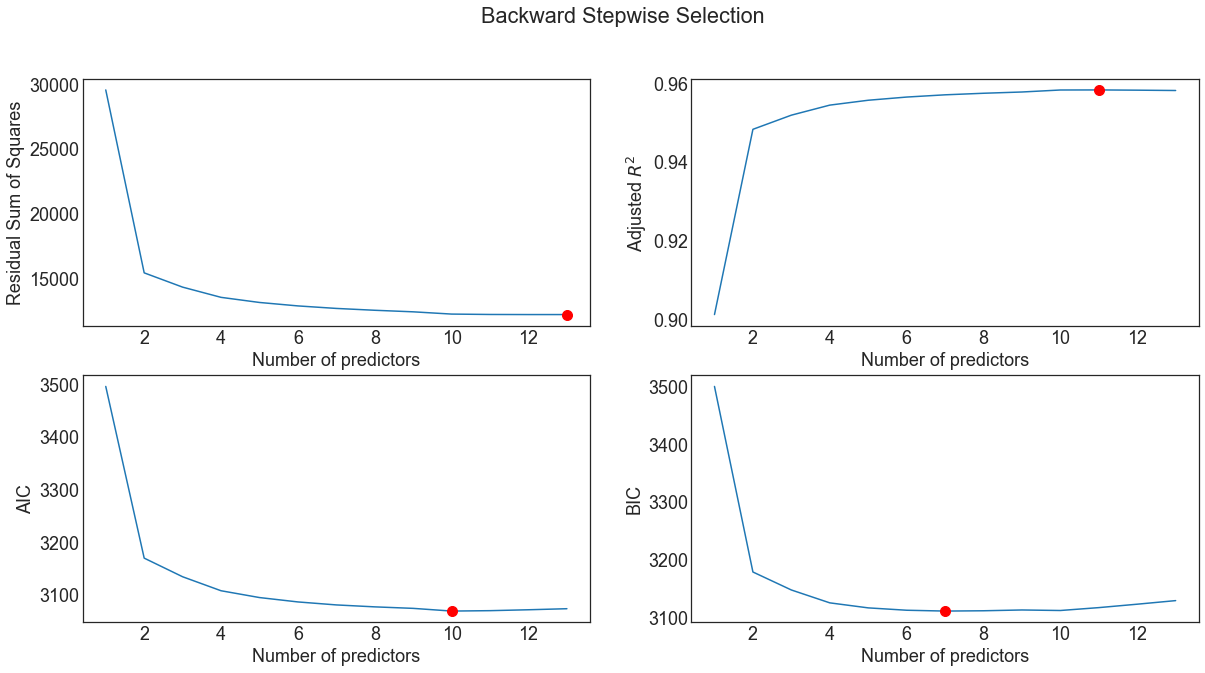

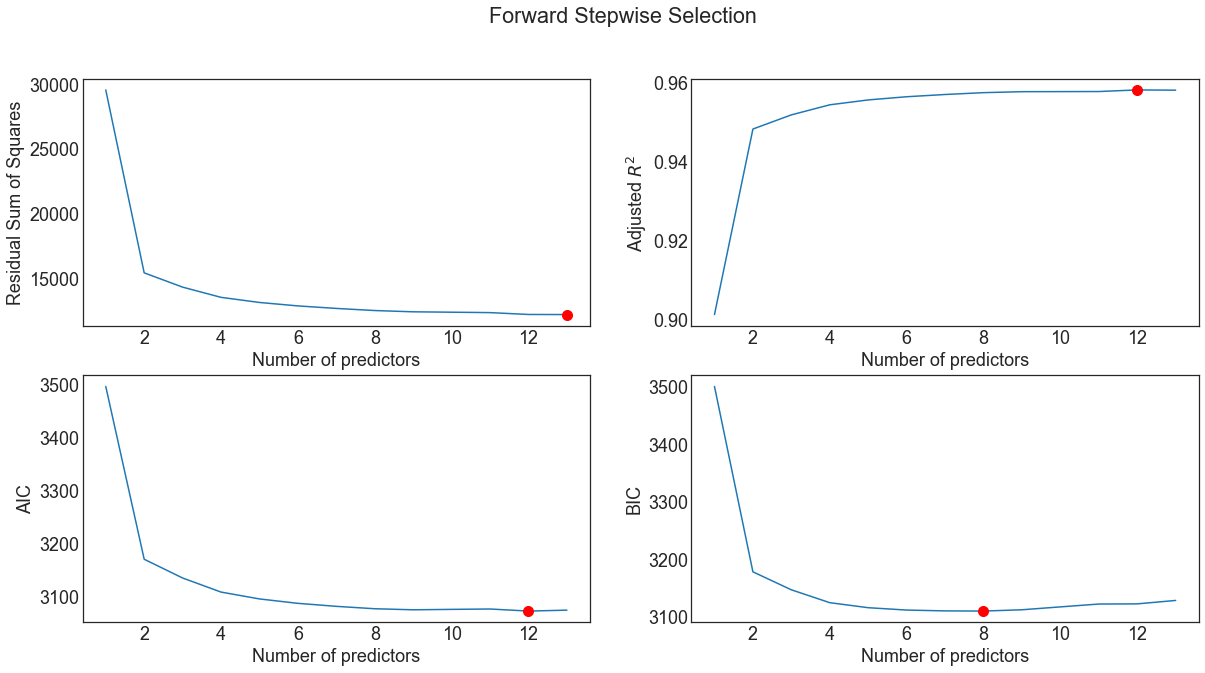

In [535]:
y = boston.medv
X = boston.drop(list(['medv']), axis=1)
all_predictors = list(boston.columns.drop('medv'))

# Run the two algorithms and plot the results

k_values, predictor_sets = backwardStepwiseSelection(X,y,all_predictors)
error_plots(k_values, predictor_sets, 'Backward Stepwise Selection')
plt.savefig('backward_selection.png', dpi=100)

k_values, predictor_sets = forwardStepwiseSelection(X,y,all_predictors)
error_plots(k_values, predictor_sets, 'Forward Stepwise Selection')
plt.savefig('forward_selection.png', dpi=100)
